In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__ , np.__version__

('0.25.3', '1.17.4')

---

此資料夾是有關"Home cridit"這間公司先前的貸款紀錄

每一行代表的都是該筆貸款每一期的貸款資訊

包含 應當還款日期、實際還款日期、應當還款金額、實際還款金額

---

In [3]:
data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\installments_payments.csv')

In [15]:
data

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Delay_Day,Payment_Diff
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,-7.0,0.000
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,0.000
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,0.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,-8.0,0.000
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0,-4.455
...,...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN,NaN,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN,NaN,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN,NaN,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN,NaN,NaN


In [5]:
data.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [6]:
# 新增欄位 " Delay_Day " 正的代表有遲交，負的表示提早
data["Delay_Day"] = data["DAYS_ENTRY_PAYMENT"] - data["DAYS_INSTALMENT"]
# 新增欄位 " Payment_Diff " 正的表示多繳，負的表示少繳
data["Payment_Diff"] = data["AMT_PAYMENT"] - data["AMT_INSTALMENT"]

In [8]:
data["Delay_Day"].sort_values(ascending=False)

8513003     2884.0
3198384     2882.0
5353635     2871.0
1564161     2852.0
2318828     2852.0
             ...  
13605396       NaN
13605397       NaN
13605398       NaN
13605399       NaN
13605400       NaN
Name: Delay_Day, Length: 13605401, dtype: float64

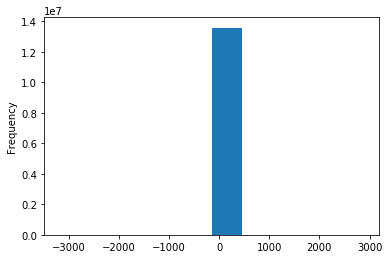

In [111]:
# 繳費日期分布
data["Delay_Day"].plot.hist()

<function matplotlib.pyplot.show(*args, **kw)>

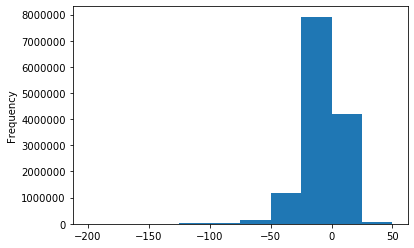

In [112]:
data["Delay_Day"].plot.hist(range=(-200,50))
plt.show

In [70]:
pd.set_option("display.max_rows",None)
data[data["Delay_Day"]<-500]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Delay_Day,Payment_Diff
12214,1641462,172486,1.0,19,-583.0,-1146.0,18175.185,9050.670,-563.0,-9124.515
60613,1044416,122917,1.0,1,-1770.0,-3026.0,2554.380,2554.380,-1256.0,0.000
73416,2825186,103841,1.0,24,-859.0,-1418.0,10570.050,10570.050,-559.0,0.000
139030,1312528,196315,1.0,25,-162.0,-671.0,20957.985,20957.985,-509.0,0.000
270277,1276289,163341,1.0,24,-1782.0,-2299.0,8478.000,8478.000,-517.0,0.000
474484,1086156,151374,1.0,22,-904.0,-1416.0,8728.470,8728.470,-512.0,0.000
518226,2825186,103841,1.0,25,-829.0,-1418.0,10570.050,10570.050,-589.0,0.000
595753,1937477,193982,1.0,3,-1869.0,-2636.0,3070.080,3070.080,-767.0,0.000
736030,2825186,103841,1.0,23,-889.0,-1418.0,10570.050,10570.050,-529.0,0.000
763302,1276289,163341,1.0,23,-1812.0,-2328.0,8478.000,8478.000,-516.0,0.000


In [72]:
pd.set_option("display.max_rows",None)
data[data["SK_ID_PREV"]==2825186].sort_values(by=["NUM_INSTALMENT_NUMBER"])

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Delay_Day,Payment_Diff
2505333,2825186,103841,1.0,1,-1549.0,-1560.0,10570.05,10570.050,-11.0,0.000
2494263,2825186,103841,1.0,2,-1519.0,-1538.0,10570.05,10570.050,-19.0,0.000
3202995,2825186,103841,1.0,3,-1489.0,-1504.0,10570.05,10570.050,-15.0,0.000
2327956,2825186,103841,1.0,4,-1459.0,-1447.0,10570.05,10568.475,12.0,-1.575
476395,2825186,103841,1.0,4,-1459.0,-1475.0,10570.05,1.575,-16.0,-10568.475
1071256,2825186,103841,1.0,5,-1429.0,-1445.0,10570.05,9.360,-16.0,-10560.690
2498039,2825186,103841,1.0,5,-1429.0,-1425.0,10570.05,10560.690,4.0,-9.360
2973405,2825186,103841,1.0,6,-1399.0,-1418.0,10570.05,10570.050,-19.0,0.000
3342705,2825186,103841,1.0,7,-1369.0,-1418.0,10570.05,10570.050,-49.0,0.000
1885442,2825186,103841,1.0,8,-1339.0,-1418.0,10570.05,10570.050,-79.0,0.000


In [46]:
pr_id = 2714724
mustPay = data[data["SK_ID_PREV"]==pr_id]["AMT_INSTALMENT"].sum()
actualyPay = data[data["SK_ID_PREV"]==pr_id]["AMT_PAYMENT"].sum()

In [47]:
print("該筆貸款應繳款項總和 : " + str(mustPay))
print("該筆貸款實際繳款總和 : " + str(actualyPay))

該筆貸款應繳款項總和 : 20516.49
該筆貸款實際繳款總和 : 16186.41


In [58]:
data["NUM_INSTALMENT_VERSION"].unique().shape[0]

65